<a href="https://colab.research.google.com/github/Arthur-Barreto/Machine-Vision/blob/main/VisComp_Class_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class 12: Image Scaling

## Preliminaries

Run the cell below to download the class pack.

In [1]:
import gdown

gdown.download(id='1LxuIA1hxbpABfB41q7LbTjBAghNlmJ--')

!unzip -o '12.zip'
!rm '12.zip'

Downloading...
From: https://drive.google.com/uc?id=1LxuIA1hxbpABfB41q7LbTjBAghNlmJ--
To: /content/12.zip
100%|██████████| 662k/662k [00:00<00:00, 7.02MB/s]


Archive:  12.zip
  inflating: atletica.png            
  inflating: consulting.png          
  inflating: harvard.png             
  inflating: informatica.png         
  inflating: insper.png              
  inflating: sdx.py                  
  inflating: smash.png               


Run the cell below to import the class modules.

If you get import warnings, try using **Ctrl+m .** (notice there is a dot there) to restart the kernel.

In [2]:
import cv2 as cv
import numpy as np

from sdx import *
from math import floor, ceil

## Loading a specific image

The idea of this notebook is, yet another time, running the same code for different images.

By changing the parameter below, you have 6 images to choose.

Possible values of `NAME`: `atletica`, `consulting`, `smash`, `insper`, `harvard`, `informatica`

In [10]:
NAME = 'smash'

The cell below loads the chosen image and converts it to gray.

Play a bit with the parameter to see the differences between the images.

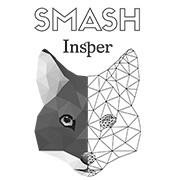

In [11]:
image = cv_grayread(f'{NAME}.png', asfloat=True)

cv_imshow(image)

## Preliminaries

The parameter below the scale factor by which we want to resize the image.

The default value is `0.8`, which means reducing to 80% of its original size.

In [12]:
SCALE = 0.8

Let's keep variables for the new shape, as we will use it multiple times.

In [13]:
height, width = image.shape

output_height = round(height * SCALE)
output_width = round(width * SCALE)

## Activity 1

Implement the **nearest neighbor** algorithm, as explained by the teacher.

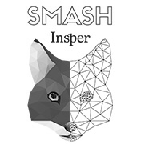

In [15]:
output_image = np.empty((output_height, output_width))

for oy in range(output_height):
  for ox in range(output_width):
    new_oy = round(oy/SCALE)
    new_ox = round(ox/SCALE)
    output_image[oy, ox] =  image[new_oy, new_ox]

cv_imshow(output_image)

## Activity 2

Implement the **average of neighbors** algorithm, as explained by the teacher.

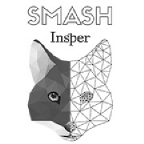

In [20]:
output_image = np.empty((output_height, output_width))

for oy in range(output_height):
  for ox in range(output_width):
    y1 = floor(oy/SCALE)
    y2 = ceil(oy/SCALE)
    x1 = floor(ox/SCALE)
    x2 = ceil(ox/SCALE)
    top_left = image[y1,x1]
    top_right = image[y1,x2]
    bottom_left = image[y2,x1]
    bottom_right = image[y2,x2]
    media = (top_left+top_right+bottom_left+bottom_right)/4
    output_image[oy, ox] = media

cv_imshow(output_image)

## Activity 3

Implement the **bilinear interpolation** algorithm, as explained by the teacher.

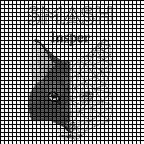

In [23]:
output_image = np.empty((output_height, output_width))

for oy in range(output_height):
  for ox in range(output_width):

    y1 = floor(oy/SCALE)
    y2 = ceil(oy/SCALE)
    x1 = floor(ox/SCALE)
    x2 = ceil(ox/SCALE)

    y = oy/SCALE
    x = ox/SCALE

    dy1 = y - y1
    dy2 = y2 - y
    dx1 = x - x1
    dx2 = x2 - x

    top_left = image[y1,x1]
    top_right = image[y1,x2]
    bottom_left = image[y2,x1]
    bottom_right = image[y2,x2]

    py1 = (dx2)*top_left + (dx1)*top_right
    py2 = (dx2)*bottom_left + (dx1)*bottom_right

    p = (dy2)*py1 + (dy1)*py2

    output_image[oy, ox] = p

cv_imshow(output_image)

## Activity 4

Implement the **fixed bilinear interpolation** algorithm, as explained by the teacher.

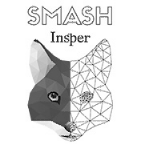

In [33]:
output_image = np.empty((output_height, output_width))

for oy in range(output_height):
  for ox in range(output_width):

    y = oy/SCALE
    x = ox/SCALE

    y1 = floor(oy/SCALE)
    y2 = ceil(oy/SCALE)
    x1 = floor(ox/SCALE)
    x2 = ceil(ox/SCALE)

    if y1 == y2 and x1 == x2:
        output_image[oy, ox] = image[y1,x1]

    elif y1 == y2:

        dx1 = x - x1
        dx2 = x2 - x

        left = image[y2,x1]
        right = image[y2,x2]
        p = (dx2)*left + (dx1)*right
        output_image[oy, ox] = p

    elif x1 == x2:

        dy1 = y - y1
        dy2 = y2 - y

        bottom = image[y2,x1]
        top = image[y1,x2]
        p = (dy2)*bottom + (dy1)*top
        output_image[oy, ox] = p

    else :

        dy1 = y - y1
        dy2 = y2 - y
        dx1 = x - x1
        dx2 = x2 - x

        top_left = image[y1,x1]
        top_right = image[y1,x2]
        bottom_left = image[y2,x1]
        bottom_right = image[y2,x2]

        py1 = (dx2)*top_left + (dx1)*top_right
        py2 = (dx2)*bottom_left + (dx1)*bottom_right

        p = (dy2)*py1 + (dy1)*py2

        output_image[oy, ox] = p

cv_imshow(output_image)

## Bicubic interpolation

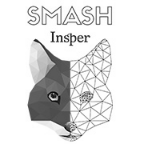

In [34]:
cv_imshow(cv.resize(image, (output_width, output_height), cv.INTER_CUBIC))

## Lanczos interpolation

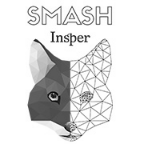

In [35]:
cv_imshow(cv.resize(image, (output_width, output_height), cv.INTER_LANCZOS4))

You can click on the toc.png tab to the left to browse by section.